# Тестовое по Python

В качестве тестового предлагается несколько задач на pandas, numpy и matplotlib - базовые библиотеки, используемые в ходе ML разработки

Если вы не встречались с этими библиотеками раньше, то это отличный повод их изучить до или во время выполнения заданий

## numpy

In [1]:
import numpy as np

### 1. Cоздание и индексация n-мерных массивов

Создать двухмерный массив случайных чисел [-9; 9] размера (10, 10). Заменить все -3<x<5 элементы такого массива на единицы, показать массив до и после замены

In [2]:
array = np.random.randint(-9, 10, (10, 10))
array

array([[-6, -2,  2, -5,  6, -6,  9, -1,  8,  7],
       [ 1, -7, -1, -3, -5,  0, -6, -4, -5,  5],
       [-5, -6, -3,  7, -9, -2, -1,  2,  1,  5],
       [ 2, -4,  4,  4,  5, -3, -6, -2, -2, -6],
       [ 1,  0,  3, -3, -5, -5, -4, -1,  2,  5],
       [ 1,  5, -6, -9,  7,  6,  4, -4, -6, -3],
       [-3,  4,  0,  6,  6, -9, -6, -5,  2, -1],
       [ 0, -8,  5,  9,  6, -9, -8, -5,  8,  5],
       [ 3, -4, -5, -6, -5,  7,  8,  1, -4,  1],
       [-5, -9,  5, -4,  0,  4,  1,  7,  9, -8]])

In [63]:
sarray = np.select([(array <= -3) | (array >= 5)], [array], default = 1)
sarray

array([[-7,  1, -4, -6,  1,  1,  8,  5,  1, -9],
       [-5,  7, -8,  1, -7,  1,  1,  1,  5, -3],
       [ 1, -7,  7,  1, -9,  1,  1, -5,  1,  8],
       [ 1,  5, -9,  9,  1,  1,  1,  1, -4,  8],
       [ 1,  1,  1,  5,  1, -7,  1,  1,  6,  9],
       [ 1, -5,  5,  1, -5,  1,  6, -5, -4,  1],
       [ 1,  1,  1,  5,  1,  8,  1,  1, -3,  1],
       [-9,  1, -7,  6,  1, -5,  5,  1, -4,  1],
       [-8,  1,  1, -6,  7,  1,  1,  1,  1, -9],
       [ 1, -6, -3,  1,  1, -9,  1, -4,  1,  1]])

### 2. Умножение матриц
Даны вектор и матрица (размер задайте сами), найти в матрице столбец(=вектор), имеющий минимальное косинусное расстояние с исходным вектором. Результат вывести, проверить корректность расчёта

In [23]:
def minCosDist(matrix, vector):
    cosine = np.ones(len(matrix))
    s = (matrix * vector).sum(axis=1)
    v1 = (matrix * matrix).sum(axis=1)
    v2 = (vector ** 2).sum(axis=0)
    return cosine - s/(v1 ** 0.5 * v2 ** 0.5)
        

vector = np.random.randint(-9, 9, 10)
print('Matrix:\n', array, '\n')
print('Vector:\n', vector, '\n')

cosin1 = minCosDist(array.T, vector)
    
mini = np.argmin(cosin1)

print("min cos dist =", cosin1[mini])
print("Column (vector) in matrix with min cos dist:\n", array.T[mini])

Matrix:
 [[-5  3  3  7  3 -6 -2  3  8  7]
 [-5 -2  7 -1  1 -3  4  2 -6  6]
 [ 0  3  5 -6 -9  1  1 -9  6  9]
 [-7 -5  3 -1 -8 -2  7 -9  6 -6]
 [ 8 -4  8 -1  4 -1  2 -4  9 -8]
 [ 9 -6 -6  6  4 -2  8 -8 -2 -7]
 [ 6  8  6  2 -6  4 -3 -7 -5  3]
 [ 9  1 -4 -1 -6 -7  5 -7 -4 -9]
 [ 4 -4  5  6  4  7 -9  0  9  5]
 [-8  8  5  1 -8  0  6 -8  4 -3]] 

Vector:
 [ 3 -3  3 -2  8 -9 -1  8 -6  4] 

min cos dist = 0.5811203139920949
Column (vector) in matrix with min cos dist:
 [ 3 -2  3 -5 -4 -6  8  1 -4  8]


In [24]:
# ПРОВЕРКА РАБОТОСПОСОБНОСТИ ФУНКЦИИ ПО НАХОЖДЕНИЮ КОСИНУСНОГО РАССТОЯНИЯ

from scipy import spatial
cosin2 = []
for i in array.T:
    cosin2.append(spatial.distance.cosine(i, vector))
print(cosin1, "\n")
print(cosin2)

[0.98052646 0.58112031 0.77172028 1.4352947  1.33950808 1.42242605
 0.87628574 1.1344609  0.78541938 1.21190808] 

[0.9805264587387671, 0.581120313992095, 0.7717202820336658, 1.4352946994733717, 1.3395080829959187, 1.422426048897513, 0.8762857378698147, 1.134460901993429, 0.7854193768667505, 1.2119080826448485]


### 3. Умножение векторов
Пусть импульс - это функция, определённая на R принимающая значение 1 на [a; b], а на остальной области определения равная нулю

Есть два импульса: 
    - [4, 5]
    - [1, 2], но его область определения ограничена - [0, 3]
   
Изучить операцию [свёртки](https://ru.wikipedia.org/wiki/Свёртка_(математический_анализ)) и сделать свёртку первого импульса вторым, показать результат свёртки. Первая гифка приведённой статьи в помощь

In [76]:
step = 0.05

ax = np.linspace(0, 10, int(10/step))
bx = np.linspace(0, 3, int(3/step))
ay = np.select([(ax < 4) | (ax > 5)], [ax*0], default = 1)
by = np.select([(bx < 1) | (bx > 2)], [bx*0], default = 1)

cx = ax = np.linspace(0, 10, int(10/step))
cy = np.convolve(ay, by, mode="same") * step
cy

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 ,
       0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85,
       0.9 , 0.95, 1.  , 0.95, 0.9 , 0.85, 0.8 , 0.75, 0.7 , 0.65, 0.6 ,
       0.55, 0.5 , 0.45, 0.4 , 0.35, 0.3 , 0.25, 0.2 , 0.15, 0.1 , 0.05,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.

## Pandas

In [67]:
import pandas as pd

Для выполнения задания используйте классический датасет [Titanic](https://www.kaggle.com/c/titanic/data)

### 1. Groupby

Сгруппировать пассажиров по полу, подумать над смыслом полученных значений в сгруппированной табличке

In [68]:
data = pd.read_csv("train.csv")
data.groupby(["Sex"]).mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


### Вывод:
1) Выживаемость у женщин гораздо выше, чем у мужчин
2) В среднем женщины на борту были моложе мужчин
3) У женщин было больше родных и родственников на борту
4) Женщины в среденм потратили на поездку на 20$ больше мужчин

### 2. Средние

Посчитать среднюю цену билета по датасету, найти 75ый [процентиль](https://ru.wikipedia.org/wiki/Квантиль) цен в датасете

In [69]:
print(data.Fare.mean())
perc = np.percentile(data.Fare, 75)
print(perc)

32.2042079685746
31.0


### 3. Фильтрация

Разбить таблицу по 75ому процентилю цены билета, сравнить выживаемость в первой и второй половине

In [70]:
data_rich = data[data.Fare > perc]
data_poor = data[data.Fare <= perc]
print(data_rich.Survived.mean(), data_poor.Survived.mean(),)

0.581081081081081 0.3183856502242152


# Matplotlib

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Гистограммы

- Постройте гистограмму по массиву из 200 случайных чисел
- Сделайте то же, но с 200 случайными числами, имеющими нормальное распределение
- (Со звёздочкой) Сгенерируйте нормальное распределение, не используя функции генерации чисел с нормальным распределением

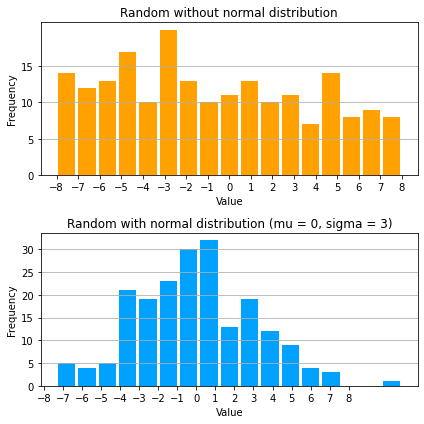

In [72]:
rand_array = np.random.randint(-8, 9, 200)
nrand_array = 3 * np.random.randn(200)

fig, axs = plt.subplots(2, 1, tight_layout=True)
axs[0].hist(x=rand_array, bins=17, color='#ffa100', rwidth=0.85)
axs[0].grid(axis='y')
axs[0].set_xlabel('Value')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Random without normal distribution')
axs[0].set_xticks(np.arange(-8, 9))
axs[0].set_yticks(np.arange(0, 20, 5))
axs[1].hist(x=nrand_array, bins=17, color='#00a1ff', rwidth=0.85)
axs[1].grid(axis='y')
axs[1].set_xlabel('Value')
axs[1].set_ylabel('Frequency')
axs[1].set_xticks(np.arange(-8, 9))
axs[1].set_title('Random with normal distribution (mu = 0, sigma = 3)')

fig.set_figheight(6)
plt.show()

### 2. Проиллюстрируйте задачи по numpy

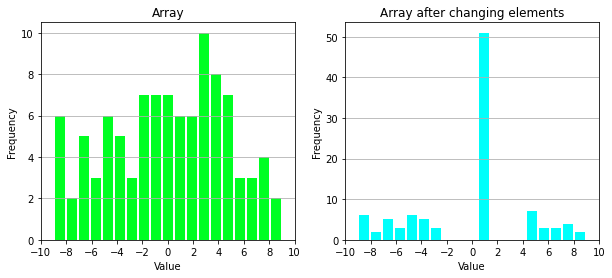

In [73]:
# ЗАДАЧА NUMPY 1
fig, axs = plt.subplots(1, 2)
axs[0].hist(x=array.ravel(), bins=19, color='#00ff22', rwidth=0.85)
axs[0].grid(axis='y')
axs[0].set_xlabel('Value')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Array')
axs[0].set_xticks(np.arange(-10, 11, 2))
axs[1].hist(x=sarray.ravel(), bins=19, color='#00fffb', rwidth=0.85)
axs[1].grid(axis='y')
axs[1].set_xlabel('Value')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Array after changing elements')
axs[1].set_xticks(np.arange(-10, 11, 2))

fig.set_figwidth(10)
plt.show()

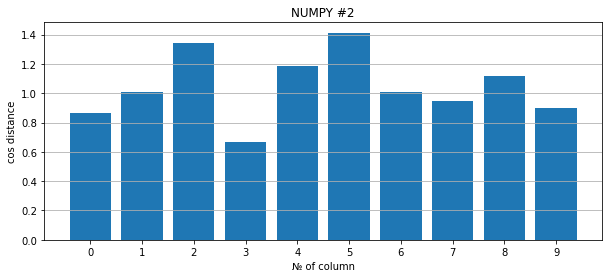

In [74]:
# ЗАДАЧА NUMPY 2
fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(np.arange(0, 10), cosin1)
ax.grid(axis='y')
ax.set_xlabel('№ of column')
ax.set_ylabel('cos distance')
ax.set_title('NUMPY #2')
ax.set_xticks(np.arange(0, 10))

fig.set_figwidth(10)
plt.show()

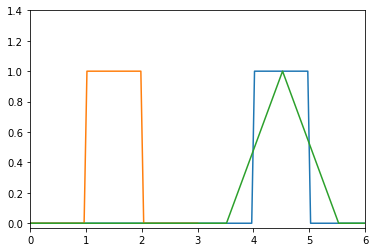

In [77]:
# ЗАДАЧА NUMPY 3
fig = plt.figure()
px = fig.add_subplot(111)
px.set(xlim = [0, 6], ylim = [-0.03, 1.4])
px.plot(ax, ay, bx, by, cx, cy)
plt.show()

### 3. Scatter plot 

 - Сгенерируйте 3 кластера двумерных данных.
 
    Кластер - объединение данных с похожими признаками. Например, нам необходимо посчитать средний балл егэ по какому-то предмету(для определенности, математики) среди учеников 11 класса. 
    Мы можем рассматривать 3 класса(физмат, химбио и гум) как 3 кластера данных.
    
 - Отразите эти данные на плоскости с помощью метода scatter. 
 
 У вас должна получиться картинка, наподобие представленной ниже:
 
 ![img](https://www.r-graph-gallery.com/img/graph/274-map-a-variable-to-ggplot2-scatterplot.png)

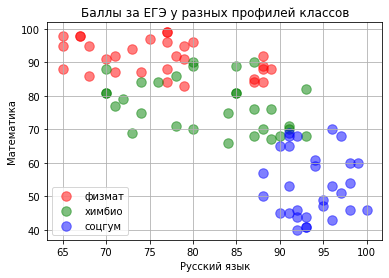

In [81]:
g1 = (np.random.randint(81, 101, 30), np.random.randint(65, 90, 30))
g2 = (np.random.randint(63, 91, 30), np.random.randint(70, 95, 30))
g3 = (np.random.randint(40, 71, 30), np.random.randint(86, 101, 30))

data = (g1, g2, g3)
colors = ("red", "green", "blue")
groups = ("физмат", "химбио", "соцгум")

fig = plt.figure()
ax = fig.add_subplot(111)


ax.set_title('Баллы за ЕГЭ у разных профилей классов')
ax.set_xlabel("Русский язык")
ax.set_ylabel("Математика")
ax.grid()
for i in range(len(data)):
    x, y = data[i][1], data[i][0]
    ax.scatter(x, y, c=colors[i], label=groups[i], alpha=0.5, s=90)
plt.legend(loc=3)
plt.show()